# Walmart

Walmart, founded in 1962 by Sam Walton, is a retail giant and one of the world's largest and most influential companies. Headquartered in Bentonville, Arkansas, this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States and in numerous countries around the world.

Known for its "Everyday Low Prices" strategy, Walmart has redefined the retail landscape with its commitment to offering a wide range of products at affordable prices. With its extensive supply chain and efficient distribution systems, the company has played a pivotal role in shaping consumer expectations and shopping habits. Beyond retail, Walmart has also ventured into e-commerce, technology innovation, and sustainability initiatives, further solidifying its position as a key player in the modern retail ecosystem.

# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as spy

In [2]:
df = pd.read_csv(r'C:\Users\SRI RAM\Desktop\walmart\walmart.txt')

# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

## 1.1)The data type of all columns in the “customers” table.

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

User_ID, Occupation, Marital_Status,Product_Category,Purchase are integer datatype.
Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years are object datatype.

## 1.2.)You can find the number of rows and columns given in the dataset

In [5]:
df.shape

(550068, 10)

There are 550068 rows and 10 columns in this dataframe

## 1.3.)Check for the missing values and find the number of missing values in each column

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


There are no nulls nor missing values

# 2.)Detect outliers

## 2.1) Find the outliers for every continuous variable in the dataset

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

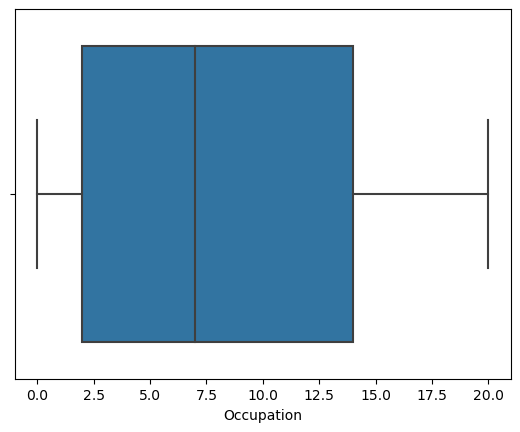

In [10]:
sns.boxplot(data=df,x='Occupation')
plt.show()

There are no outliers in 'Occupation' column

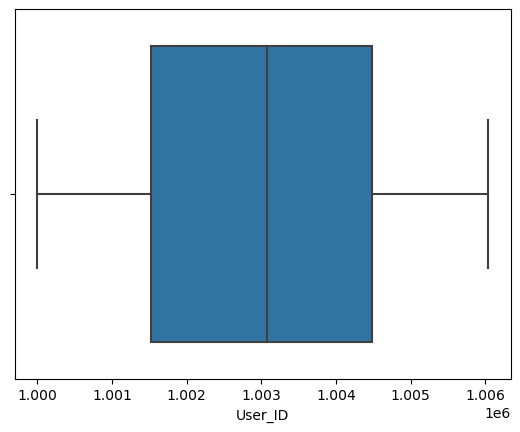

In [11]:
sns.boxplot(data=df,x='User_ID')
plt.show()

There are no outliers in 'User_ID' column

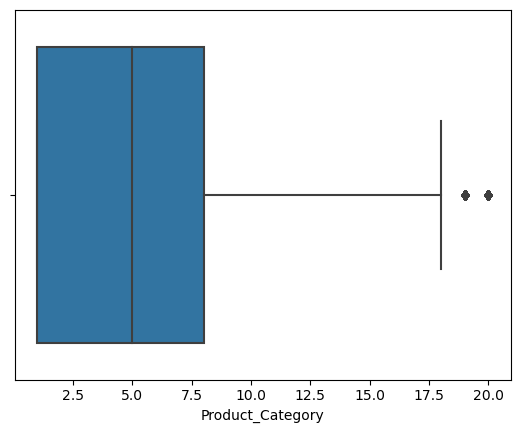

In [12]:
sns.boxplot(data=df,x='Product_Category')
plt.show()

There are outliers in 'Product_Category' after 18

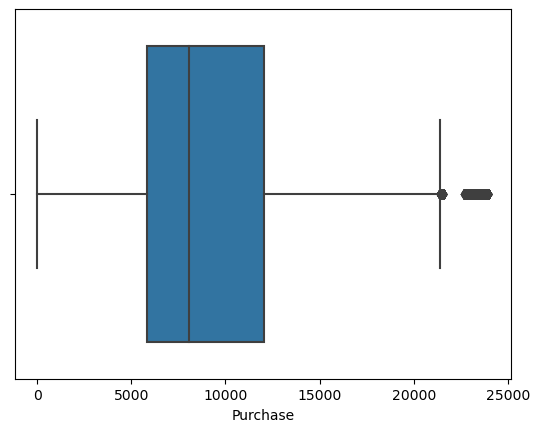

In [13]:
sns.boxplot(data=df,x='Purchase')
plt.show()

There are outliers in 'Purchase' after 

## 2.2)Remove/clip the data between the 5 percentile and 95 percentile

In [14]:
lower_percentile = 0.05
higher_percentile = 0.95

In [15]:
low, high = df["Product_Category"].quantile([lower_percentile, higher_percentile])
low, high

(1.0, 13.0)

In [16]:
df.Product_Category.value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

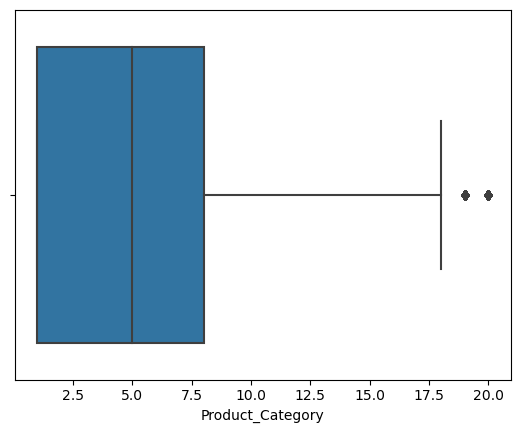

In [17]:
sns.boxplot(data=df,x='Product_Category')
plt.show()

In [18]:
df["Product_Category"] = np.clip(df["Product_Category"], a_min = low, a_max = high)
df.Product_Category.value_counts()

Product_Category
5     150933
1     140378
8     113925
13     31046
11     24287
2      23864
6      20466
3      20213
4      11753
10      5125
12      3947
7       3721
9        410
Name: count, dtype: int64

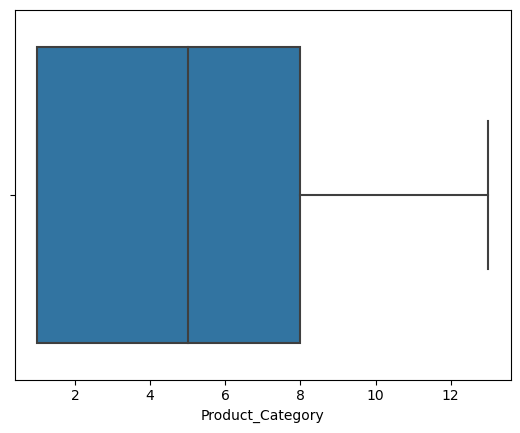

In [19]:
sns.boxplot(data=df,x='Product_Category')
plt.show()

Using nclip outliers are removed from column 'Product_Category'

In [20]:
low2, high2 = df["Purchase"].quantile([lower_percentile, higher_percentile])
low2, high2

(1984.0, 19336.0)

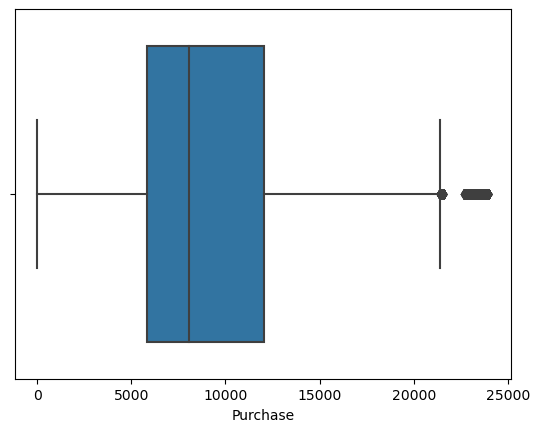

In [21]:
sns.boxplot(data=df,x='Purchase')
plt.show()

In [22]:
df.Purchase.value_counts()

Purchase
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: count, Length: 18105, dtype: int64

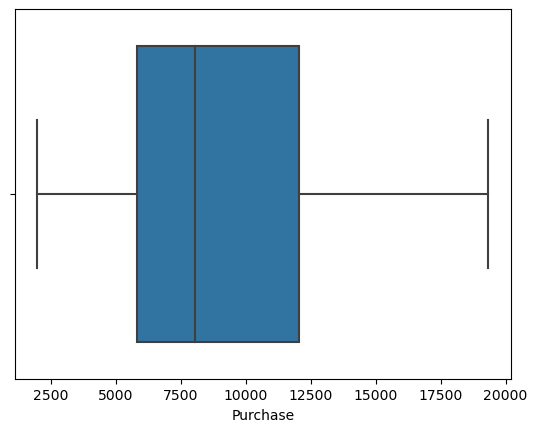

In [23]:
df["Purchase"] = np.clip(df["Purchase"], a_min = low2, a_max = high2)
sns.boxplot(data=df,x='Purchase')
plt.show()

Using nclip outliers are removed from column 'Purchase'
'

# 3. Data Exploration

## What products are different age groups buying?

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


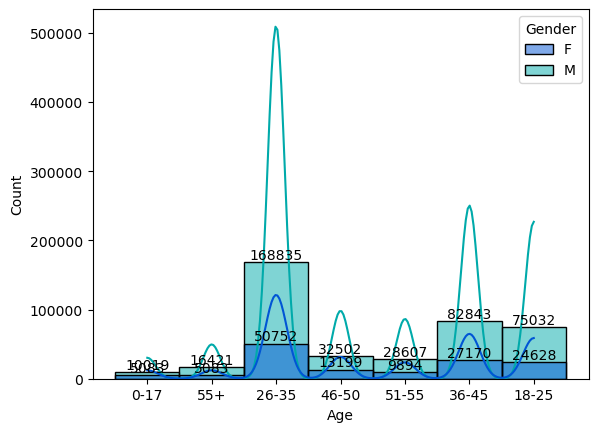

In [25]:
bx=sns.histplot(x='Age', data=df, discrete='false', hue="Gender", palette='winter', kde= True)
for container in bx.containers:
    bx.bar_label(container)
plt.show()

1) Age group between 26 and 35 done most buying in both genders
2) 2nd highest buying done by age group of 36 and 45 in both genders.
3) 3rd highest buying done by age group of 16 and 25 in both genders


## 3.2)Is there a relationship between age, marital status, and the amount spent?

In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


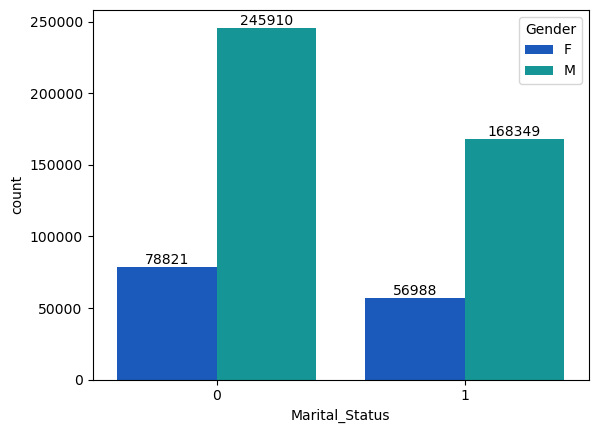

In [27]:
ax=sns.countplot(data = df, x = 'Marital_Status' , hue = 'Gender', palette='winter')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

1) unmarried customers are more in numbers compare to married
2) Male customers are more in number in both married and unmmarried catagory

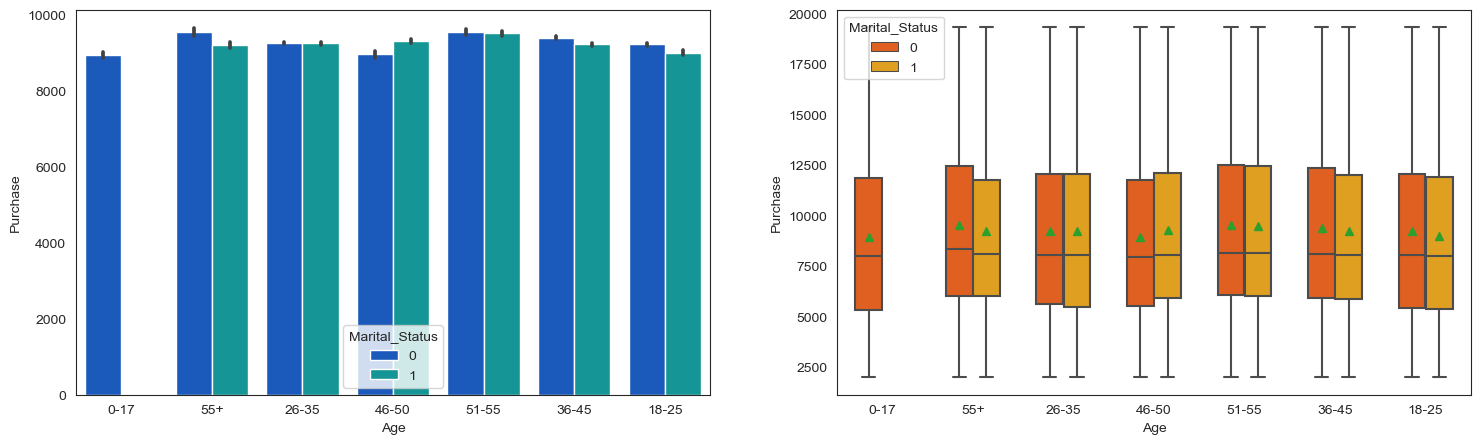

In [28]:
fig = plt.figure(figsize=(18,5))
sns.set_style("white")

plt.subplot(1, 2, 1)
sns.barplot(x="Age", y="Purchase", data=df, hue ='Marital_Status',palette='winter' )
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Marital_Status',palette='autumn', showmeans = True, width = 0.6)
plt.show()

There are not much variation of amount spend by various age groups in both married and unmarried groups.


## 3.3)Are there preferred product categories for different genders?

In [29]:
df_male=df[df['Gender']=='M']
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [30]:
df_female=df[df['Gender']=='F']
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


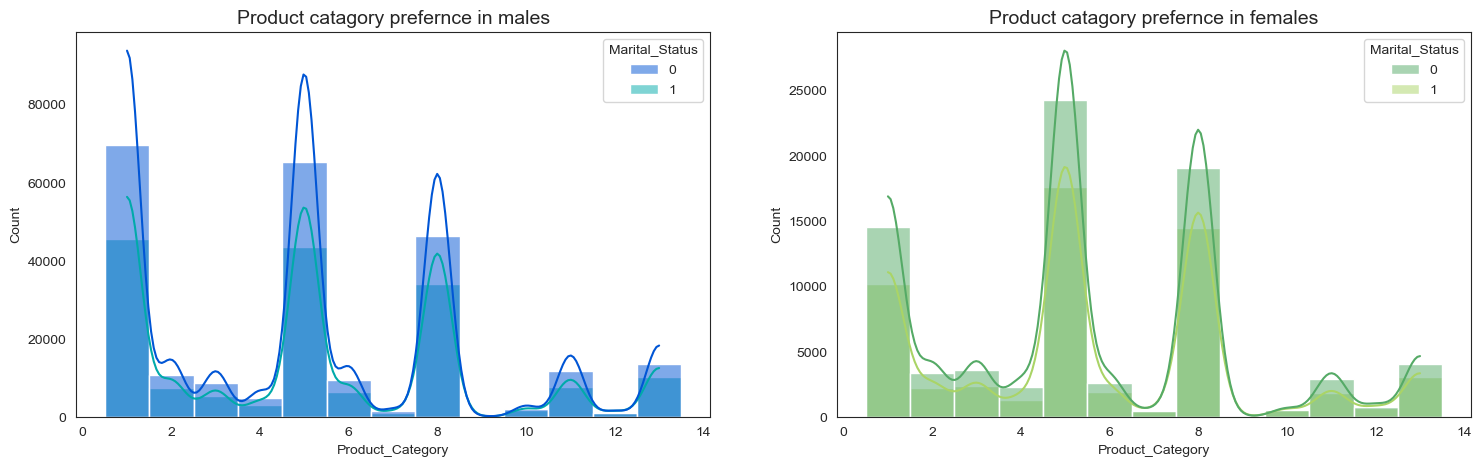

In [31]:
fig = plt.figure(figsize=(18,5))
sns.set_style("white")

plt.subplot(1, 2, 1)
sns.histplot(x='Product_Category', data=df_male, discrete='false', hue="Marital_Status", palette='winter', kde= True)

plt.title('Product catagory prefernce in males', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(x='Product_Category', data=df_female, discrete='false', hue="Marital_Status", palette='summer', kde= True)
plt.title("Product catagory prefernce in females", fontsize = '14')

plt.show()

1) Blue graph represent product prefernce by males and green graph represent product prefernce of female
2) Variation in KDE is same in both male and female.
3) Variation in product prefernce is same in both married and unmarried group.
4) Even though variation is same in both males and females, males purchased more than males in each product catagory

# 4. How does gender affect the amount spent?

In [32]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [33]:
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
temp

,Gender,sum,count
0,F,1186500797,135809
1,M,3905319428,414259


In [34]:
df_male_customer=df[df['Gender']=='M']
df_male_customer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [35]:
df_males=df_male_customer.groupby('User_ID')['Purchase'].agg(['sum','count']).reset_index()
df_males.head()

,User_ID,sum,count
0,1000002,809331,77
1,1000003,341251,29
2,1000004,207614,14
3,1000005,819006,106
4,1000007,236325,17


In [36]:
df_males.rename(columns = {'sum':'Total Purchase'}, inplace = True) 
df_males.head()

,User_ID,Total Purchase,count
0,1000002,809331,77
1,1000003,341251,29
2,1000004,207614,14
3,1000005,819006,106
4,1000007,236325,17


In [37]:
df_males.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         4225 non-null   int64
 1   Total Purchase  4225 non-null   int64
 2   count           4225 non-null   int64
dtypes: int64(3)
memory usage: 99.2 KB


In [38]:
df_Female_customer=df[df['Gender']=='F']
df_Females=df_Female_customer.groupby('User_ID')['Purchase'].agg(['sum','count']).reset_index()
df_Females.rename(columns = {'sum':'Total Purchase'}, inplace = True) 
df_Females.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         1666 non-null   int64
 1   Total Purchase  1666 non-null   int64
 2   count           1666 non-null   int64
dtypes: int64(3)
memory usage: 39.2 KB


[]

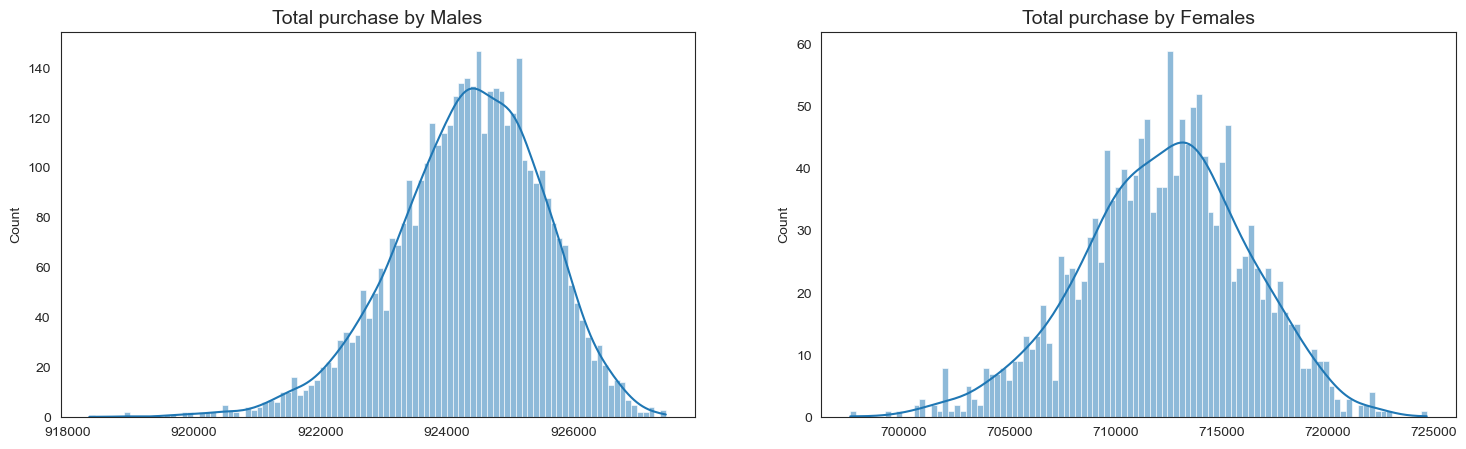

In [39]:
means = []
for sample_size in range(4200):
    sample_mean = df_males['Total Purchase'].sample(4200).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(1600):
    sample_mean1 = df_Females['Total Purchase'].sample(1600).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total purchase by Males', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 100)
plt.title('Total purchase by Females', fontsize = '14')
plt.plot()

1) As both male and female are left skewed, we can say more people in both gender spend
2) Count of male is higher than female showing that there are more males who purchased than female in that perticular amount
3) males spent more in amount compare to females

[]

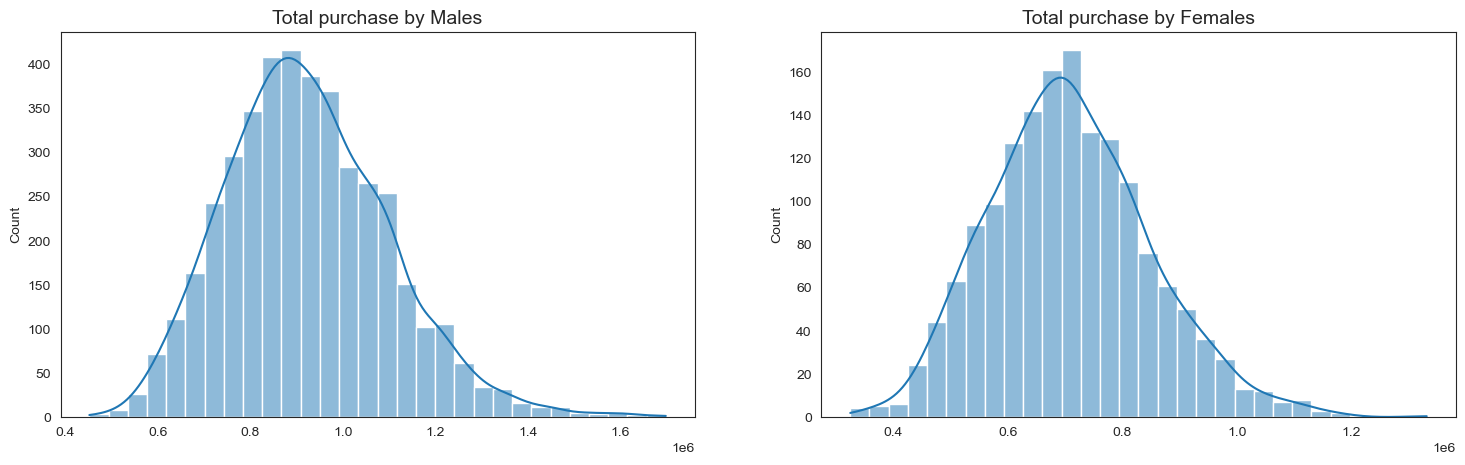

In [40]:
means3 = []
for sample_size in range(4200):
    sample_mean3 = df_males['Total Purchase'].sample(30).mean()
    means3.append(sample_mean3)
    
means4 =[]
for sample_size in range(1600):
    sample_mean4 = df_Females['Total Purchase'].sample(30).mean()
    means4.append(sample_mean4)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means3, kde = True, bins = 30)
plt.title('Total purchase by Males', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means4, kde = True, bins = 30)
plt.title('Total purchase by Females', fontsize = '14')
plt.plot()

In [41]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(924341.2439815194, 1176.7953204621278)

mean/avg of purchase among males is 924330.277481916 and standard divation is 1160.1733642744564

In [42]:
sample_mean1 = np.mean(means1) 
sample_std1 = np.std(means1)
sample_mean1, sample_std1

(712252.9061246094, 3951.2240711830764)

mean/avg of purchase among females is 712333.0123574218 and standard divation is 3952.578316670112

Standard divation of pruchase among females is more than males while males spend more than females 

### Determining Mean Purchase made by males and females with 95% Confidence

In [43]:
low_end= (sample_mean + (spy.norm.ppf(0.025)* sample_std))
high_end= (sample_mean + (spy.norm.ppf(0.975)* sample_std))
low_end, high_end

(922034.7675362383, 926647.7204268004)

95% of customers among males spend between 922056.3794721154 & 926604.1754917166

In [44]:
df_males_95=df_males[df_males['Total Purchase'] <= 931123.458760197]
df_males_95=df_males_95[df_males_95['Total Purchase']>= 917564.8208803027]
df_males_95.head()

,User_ID,Total Purchase,count
662,1000945,919199,102
853,1001220,925425,108
979,1001408,924770,82
1092,1001551,920242,95
1493,1002097,930375,102


df_males_95 is list of males who spent between 922056.3794721154 & 926604.1754917166

In [45]:
low_end1= (sample_mean1 + (spy.norm.ppf(0.025)* sample_std1))
high_end1= (sample_mean1 + (spy.norm.ppf(0.975)* sample_std1))
low_end1, high_end1

(704508.6492502429, 719997.162998976)

95% of customers among females spend between 704586.1012106744 & 720079.9235041692

In [46]:
df_Females_95=df_Females[df_Females['Total Purchase'] <= 720053.5742473848]
df_Females_95=df_Females_95[df_Females_95['Total Purchase']>= 704610.5127951152]
df_Females_95.head()

,User_ID,Total Purchase,count
163,1000594,709087,90
177,1000641,704697,74
203,1000755,710131,71
519,1002002,714169,78
862,1003219,707557,78


df_Females_95 is list of females who spent between 704586.1012106744 & 720079.9235041692

# 5)How does Marital_Status affect the amount spent?

In [47]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [48]:
df_Ma=df[df['Marital_Status']==1]
df_Married=df_Ma.groupby('User_ID')['Purchase'].agg(['sum','count']).reset_index()
df_Married.rename(columns = {'sum':'Total Purchase'}, inplace = True) 
df_Married.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         2474 non-null   int64
 1   Total Purchase  2474 non-null   int64
 2   count           2474 non-null   int64
dtypes: int64(3)
memory usage: 58.1 KB


In [49]:
df_Un=df[df['Marital_Status']==0]
df_Unmarried=df_Un.groupby('User_ID')['Purchase'].agg(['sum','count']).reset_index()
df_Unmarried.rename(columns = {'sum':'Total Purchase'}, inplace = True) 
df_Unmarried.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         3417 non-null   int64
 1   Total Purchase  3417 non-null   int64
 2   count           3417 non-null   int64
dtypes: int64(3)
memory usage: 80.2 KB


[]

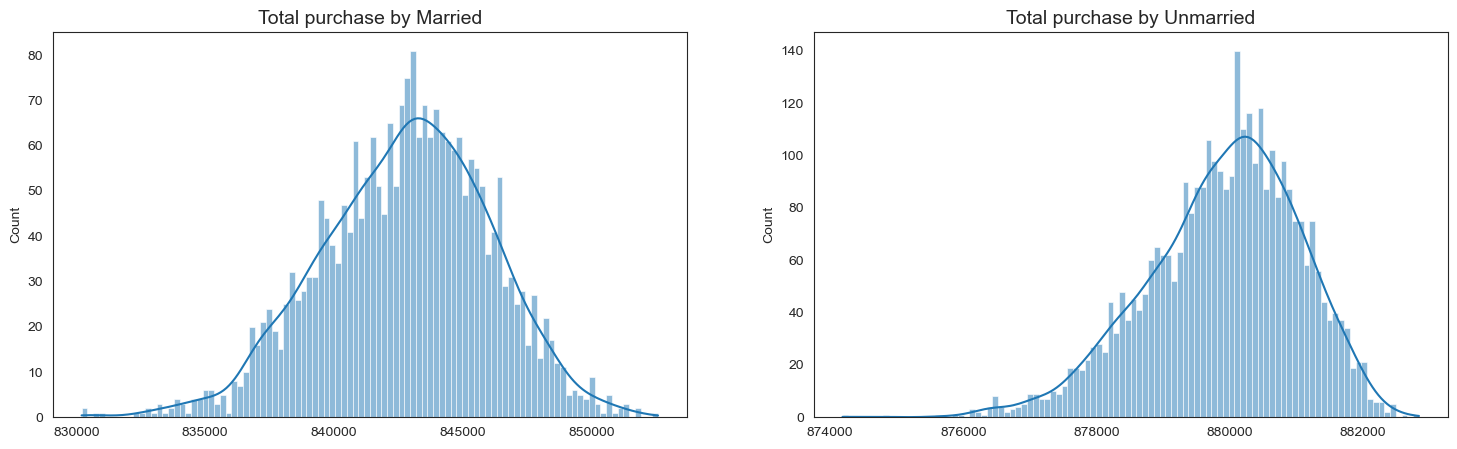

In [50]:
means = []
for sample_size in range(2400):
    sample_mean = df_Married['Total Purchase'].sample(2400).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(3400):
    sample_mean1 = df_Unmarried['Total Purchase'].sample(3400).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total purchase by Married', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 100)
plt.title('Total purchase by Unmarried', fontsize = '14')
plt.plot()

1) Unmarried people spent more than married people
2) Both graphs are left skewed so most of marriied and unmarried population spent more
3) Count of unmarried is higher than married showing more unmarried poeple spent than married

[]

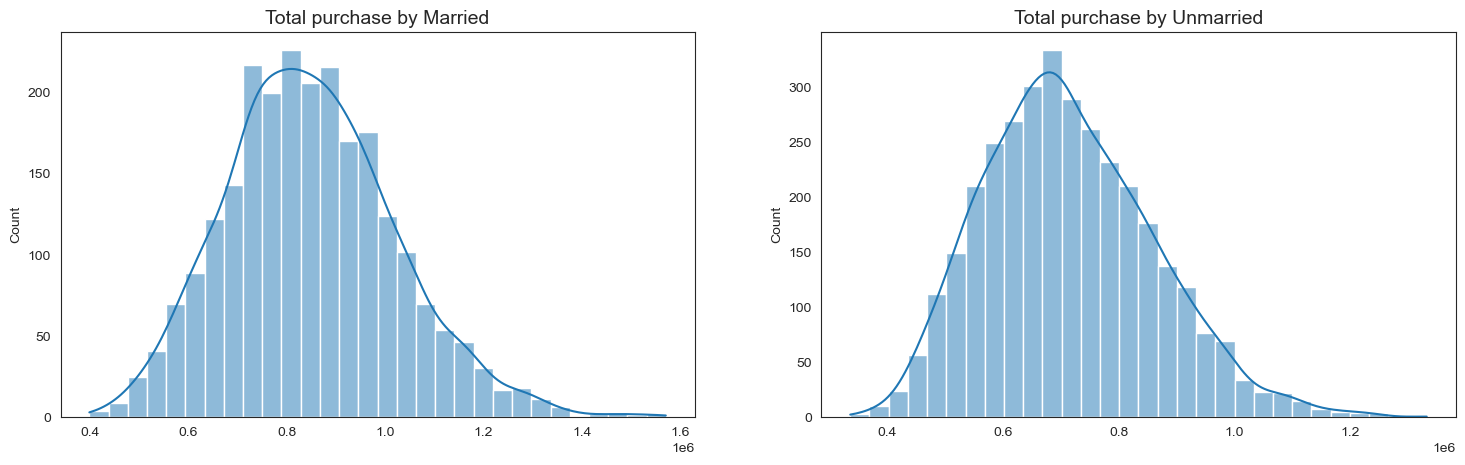

In [51]:
means3 = []
for sample_size in range(2400):
    sample_mean3 = df_Married['Total Purchase'].sample(30).mean()
    means3.append(sample_mean3)
    
means4 =[]
for sample_size in range(3400):
    sample_mean4 = df_Females['Total Purchase'].sample(30).mean()
    means4.append(sample_mean4)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means3, kde = True, bins = 30)
plt.title('Total purchase by Married', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means4, kde = True, bins = 30)
plt.title('Total purchase by Unmarried', fontsize = '14')
plt.plot()

In [52]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(842781.7673517361, 3282.0175396351733)

Mean/avg of money spent by married poeple is 842974.6170505207  and standard divation from mean is  3272.7316610236685

In [53]:
sample_mean1 = np.mean(means1) 
sample_std1 = np.std(means1)
sample_mean1, sample_std1

(879898.7918187716, 1144.2021958379858)

Mean/avg of money spent by unmarried poeple is 879884.6444304498 and standard divation from mean is 1140.978336187736

standard divation is more among married people than unmarried while unmarried people spent more than married people

### Determining Mean Purchase made by married and unmarried with 95% Confidence

In [54]:
low_end= (sample_mean + (spy.norm.ppf(0.025)* sample_std))
high_end= (sample_mean + (spy.norm.ppf(0.975)* sample_std))
low_end, high_end

(836349.1311774224, 849214.4035260498)

95% of customers among married spend between 836560.1808638504 & 849389.053237191

In [55]:
df_married_95=df_Married[df_Married['Total Purchase'] <= 849329.823348933]
df_married_95=df_married_95[df_married_95['Total Purchase']>= 836393.6720996782]
df_married_95.head()

,User_ID,Total Purchase,count
193,1000493,846415,86
369,1000952,848185,97
533,1001345,837033,112
695,1001709,844453,120
1007,1002435,848468,68


df_married_95 is list of customers whose spending fall in 95% bracket

In [56]:
low_end1= (sample_mean1 + (spy.norm.ppf(0.025)* sample_std1))
high_end1= (sample_mean1 + (spy.norm.ppf(0.975)* sample_std1))
low_end1, high_end1

(877656.1967238975, 882141.3869136458)

95% of customers among Unmarried spend between 877648.3679843814 & 882120.9208765182

In [57]:
df_Unmarried_95=df_Unmarried[df_Unmarried['Total Purchase'] <= 882087.2304045288]
df_Unmarried_95=df_Unmarried_95[df_Unmarried_95['Total Purchase']>= 877703.1497496234]
df_Unmarried_95.head()

,User_ID,Total Purchase,count
114,1000210,880942,58
290,1000496,880339,68
455,1000783,881906,72
1425,1002572,881387,84
1843,1003277,878442,85



df_Unmarried_95 is list of customers whose spending fall in 95% bracket

# 6. How does Age affect the amount spent?

In [58]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [59]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']


In [60]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

### For Age Group 0 - 17 years

In [61]:
df_age_0_to_17.head()

,User_ID,Total_Purchase
0,1000001,337223
1,1000019,1459909
2,1000051,200810
3,1000075,1036575
4,1000086,292618


In [62]:
df_age_0_to_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         218 non-null    int64
 1   Total_Purchase  218 non-null    int64
dtypes: int64(2)
memory usage: 3.5 KB


[]

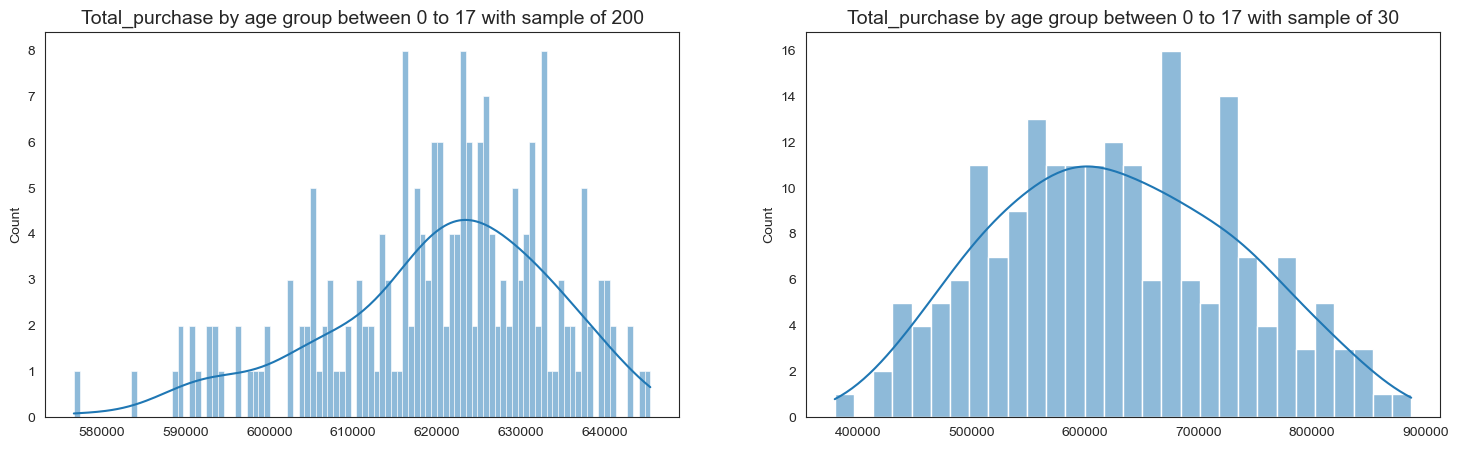

In [63]:
means = []
for sample_size in range(200):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(200).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(200):
    sample_mean1 = df_age_0_to_17['Total_Purchase'].sample(30).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total_purchase by age group between 0 to 17 with sample of 200', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 30)
plt.title('Total_purchase by age group between 0 to 17 with sample of 30', fontsize = '14')
plt.plot()

1) As number of samples increase graph becomes more acurate
2) Age group between 0 to 17 spend more indicating left skewed graph


In [64]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(620205.40625, 13439.087071242733)

Mean/avg of amount spent by age group of 0 to 17 is 617330.33315 and standard divation is 15146.462382388941

In [65]:
low,high=sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std
low,high

(593865.2796052664, 646545.5328947336)

95% of customer in age group of 0 to 17 do purchase between 587643.8123873268 & 647016.8539126731

### For Age Group 18 - 25 years

In [66]:
df_age_18_to_25.head()

,User_ID,Total_Purchase
0,1000018,1981408
1,1000021,128890
2,1000022,1283078
3,1000025,536489
4,1000034,809260


In [67]:
df_age_18_to_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         1069 non-null   int64
 1   Total_Purchase  1069 non-null   int64
dtypes: int64(2)
memory usage: 16.8 KB


[]

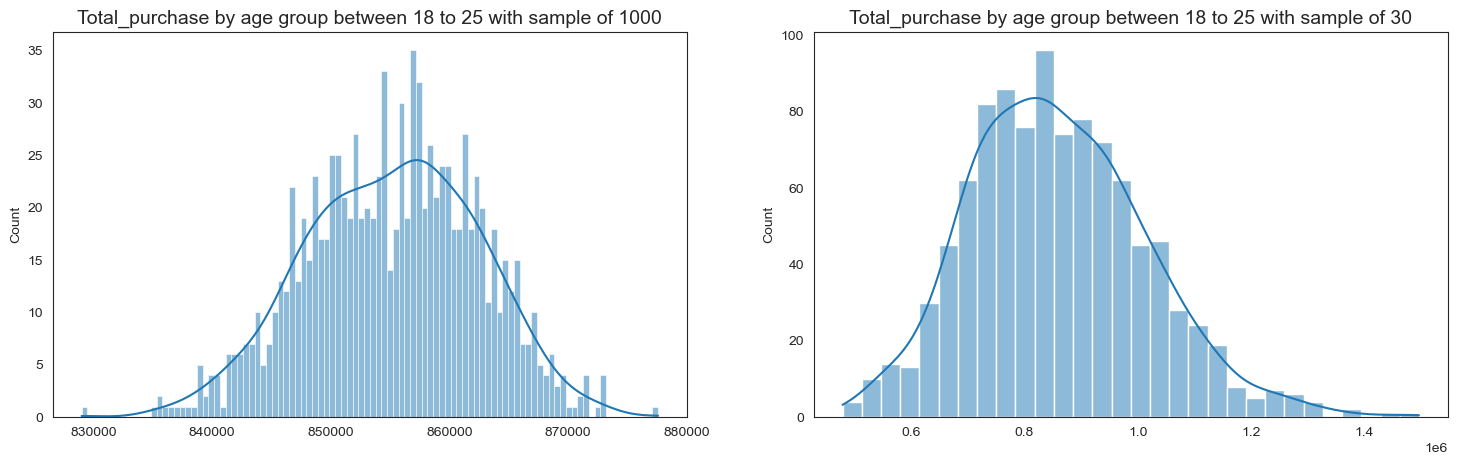

In [68]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(1000).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(1000):
    sample_mean1 = df_age_18_to_25['Total_Purchase'].sample(30).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total_purchase by age group between 18 to 25 with sample of 1000', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 30)
plt.title('Total_purchase by age group between 18 to 25 with sample of 30', fontsize = '14')
plt.plot()

1) The graph becomes more sharper as more smaples are taken
2) Above graph is almost nornal distributon indicating that customers who spent heavy and customers who spent very less are evenly distrubuted for age group of 18 to 25

In [69]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(855199.3781489999, 7251.12175963172)

Mean/avg of amount spent by age group of 18 to 25 is 854611.4865319999 and standard divation is 7087.236865381461

In [70]:
low,high=sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std
low,high

(840987.440652607, 869411.3156453928)

95% of customer in age group of 18 to 25 do purchase between 840720.7575259476 & 868502.2155380521

### For Age Group 26 - 35 years

In [71]:
df_age_26_to_35.head()

,User_ID,Total_Purchase
0,1000003,341251
1,1000005,819006
2,1000008,796081
3,1000009,594636
4,1000011,556294


In [72]:
df_age_26_to_35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         2053 non-null   int64
 1   Total_Purchase  2053 non-null   int64
dtypes: int64(2)
memory usage: 32.2 KB


[]

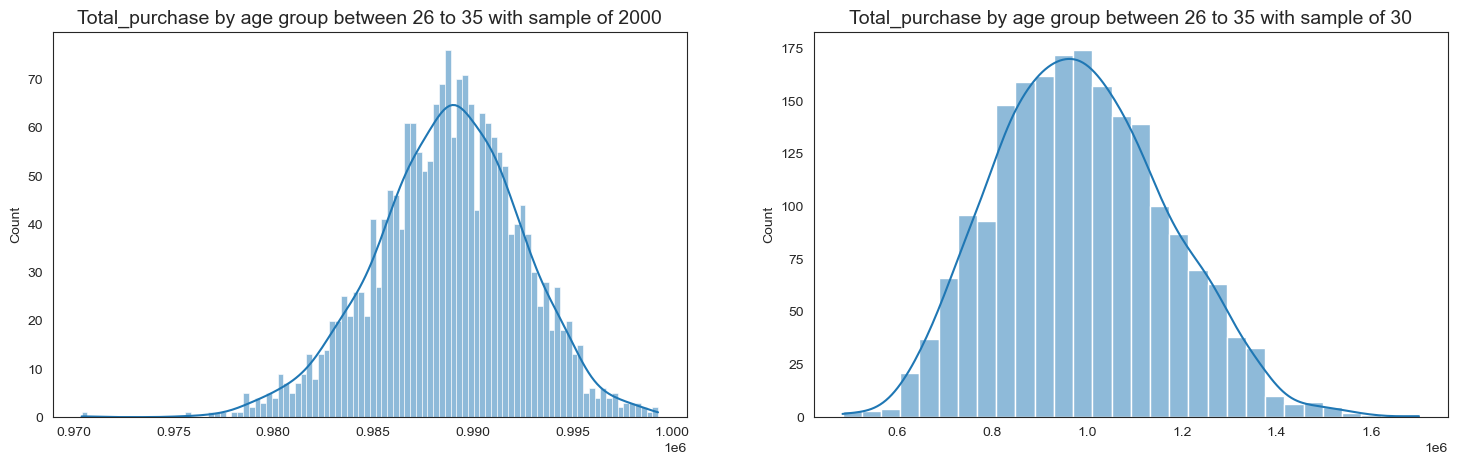

In [73]:
means = []
for sample_size in range(2000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(2000).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(2000):
    sample_mean1 = df_age_26_to_35['Total_Purchase'].sample(30).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total_purchase by age group between 26 to 35 with sample of 2000', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 30)
plt.title('Total_purchase by age group between 26 to 35 with sample of 30', fontsize = '14')
plt.plot()

1) Graphs become sharper when more samples are taken
2) The graph is left skewed indicating that more customers purchased more than mean in age group of 26 to 35

In [74]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(988756.07958425, 3662.9782170926205)

Mean/avg of amount spent by age group of 26 to 35 is 988742.3470515 and standard divation is 3637.850301567812

In [75]:
low,high=sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std
low,high

(981576.7742025937, 995935.3849659063)

95% of customer in age group of 26 to 35 do purchase between 981612.2914792789 & 995872.402623721

### For Age Group 36 - 45 years

In [76]:
df_age_36_to_45.head()

,User_ID,Total_Purchase
0,1000007,236325
1,1000010,2171274
2,1000014,126653
3,1000016,152091
4,1000023,1675056


In [77]:
df_age_36_to_45.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         1167 non-null   int64
 1   Total_Purchase  1167 non-null   int64
dtypes: int64(2)
memory usage: 18.4 KB


[]

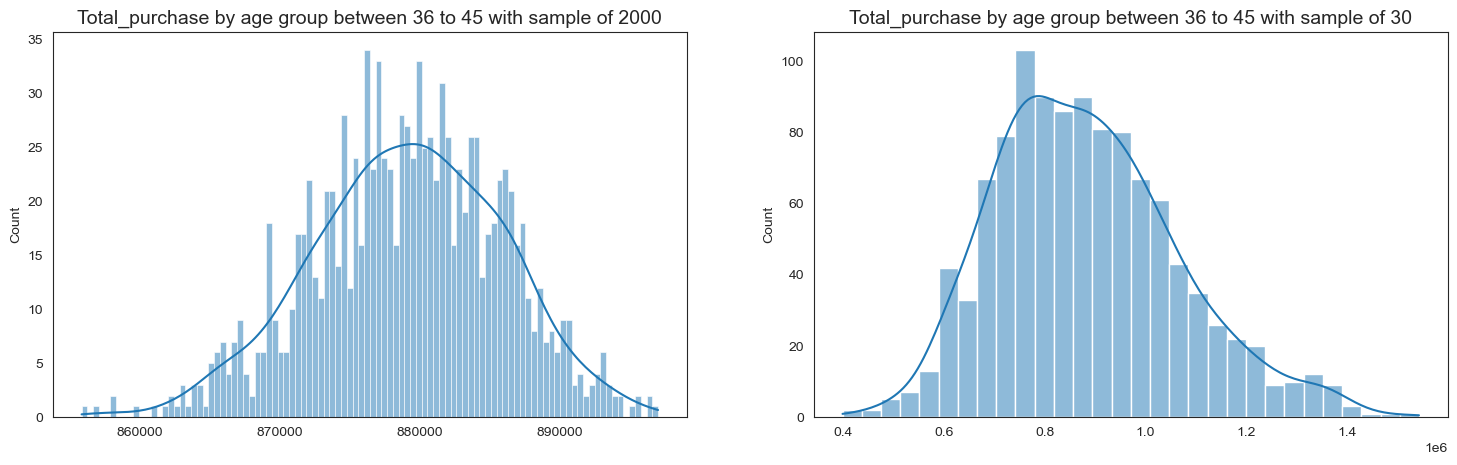

In [78]:
means = []
for sample_size in range(1100):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(1100).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(1100):
    sample_mean1 = df_age_36_to_45['Total_Purchase'].sample(30).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total_purchase by age group between 36 to 45 with sample of 2000', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 30)
plt.title('Total_purchase by age group between 36 to 45 with sample of 30', fontsize = '14')
plt.plot()

1) More the sample size, graph becomes even more sharper
2) The above graph looks like normal distribution indicating that spending by customers between age of 36 to 45 are evenly distributed on both sides of mean

In [79]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(879079.8071619835, 6766.112079115374)

Mean/avg of amount spent by age group of 36 to 45 is 879002.5992578511and standard divation is 7063.239768620469

In [80]:
low,high=sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std
low,high

(865818.4711715559, 892341.143152411)

95% of customer in age group of 36 to 45 do purchase between 864952.0005612065 & 893167.1476883803

### For Age Group 45 - 50 years

In [81]:
df_age_46_to_50.head()

,User_ID,Total_Purchase
0,1000004,207614
1,1000013,713594
2,1000033,1951360
3,1000035,825362
4,1000044,1183898


In [82]:
df_age_46_to_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         531 non-null    int64
 1   Total_Purchase  531 non-null    int64
dtypes: int64(2)
memory usage: 8.4 KB


[]

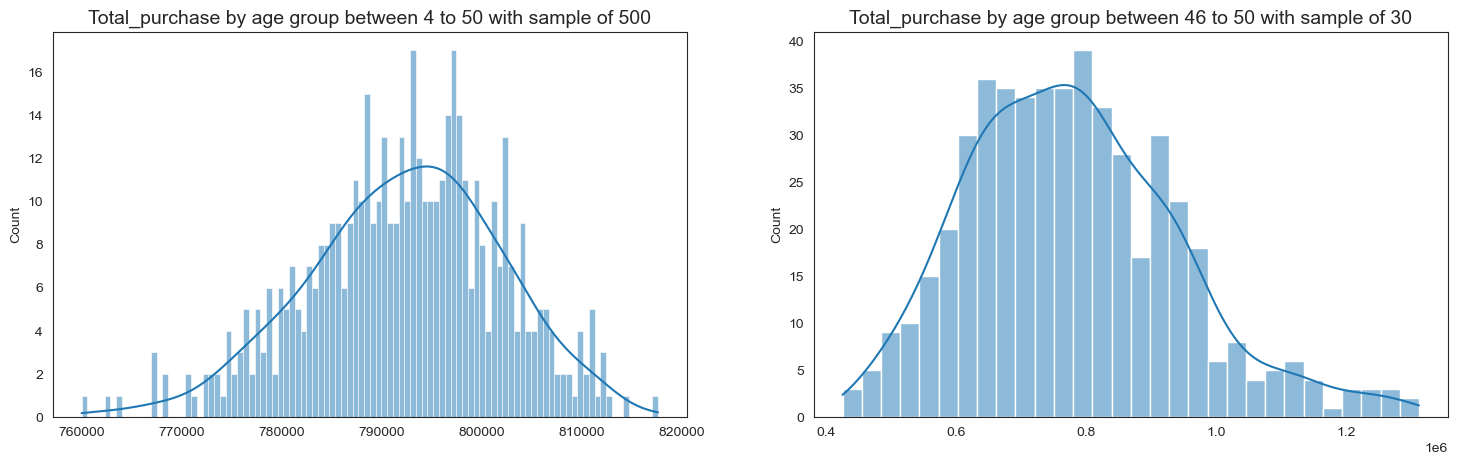

In [83]:
means = []
for sample_size in range(500):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(500).mean()
    means.append(sample_mean)
    
means1 =[]
for sample_size in range(500):
    sample_mean1 = df_age_46_to_50['Total_Purchase'].sample(30).mean()
    means1.append(sample_mean1)
    
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
sns.histplot(means, kde = True, bins = 100)
plt.title('Total_purchase by age group between 4 to 50 with sample of 500', fontsize = '14')

plt.subplot(1, 2, 2)
sns.histplot(means1, kde = True, bins = 30)
plt.title('Total_purchase by age group between 46 to 50 with sample of 30', fontsize = '14')
plt.plot()

1) Graph becomes more shaper with more samples taken from avaiable set
2) Graph is skewed to left indicating that more customers spent more than mean between age group of 46 to 50

In [84]:
sample_mean = np.mean(means) 
sample_std = np.std(means)
sample_mean, sample_std

(792315.3459119999, 9632.787098106504)

Mean/avg of amount spent by age group of 46 to 50 is 792591.7647 and standard divation is 9713.699047636173

In [85]:
low,high=sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std
low,high

(773435.430128969, 811195.2616950307)

95% of customer in age group of 46 to 50 do purchase between 773553.2644099721 & 811630.264990028

# 7. Create a report

1) Out of every four transactions made on Black Friday in the Walmart stores, three are made by the males and one is made by the females.
2) 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.)
3) Majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.
4) 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.
5) There are 1666 unique female customers and 4225 unique male customers. Average number of transactions made by each Male on Black Friday is 98 while for Female it is 82.
6) On an average each male makes a total purchase of 712024.394958 on Black Friday while for each female the figure is 925344.402367.
7) 76.72 % of the total revenue is generated from males.
8) Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
9) Average number of transactions made by each user with marital status Married is 91 and for Single it is 95.
10) On an average each Married customer makes a total purchase of 843526.796686 on Black Friday while for each Single customer the figure is 880575.781972.
11) 59.05 % of the total revenue is generated from the customers who are Single.
12) Majority of the transactions are made by the customers whose age is between 26 and 45 years.
13) About 81.82% of the total transactions are made by customers of age between 18 and 50 years.
14) 81.82 % of total unique customers have age between 18 and 50 years.
15) Top 5 product categories from which Walmart made 84.36 % of total revenue on Black Friday are 1, 5, 8, 6 and 2.
16) Mean Total Purchase made by males lies in the 95% Confidence Interval of (918302.05, 932574.64) 
17) Mean Total Purchase made by females lies in the 95% Confidence Interval of (699704.69, 724203.20)
18) Mean Total Purchase made by singles lies in the 95% Confidence Interval of (868625.72, 892639.32)
19) Mean Total Purchase made by marrieds lies in the 95% Confidence Interval of (854476.02, 907733.47)

# Recommendations

1) Since the average total purchase made by males is greater than females, Walmart should give special attention to their choices of products so as to retain them.
2) Since 82.33 % of the total transactions are made by the customers belonging to the occupations 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, Walmart should keep on adding new quality products related to their field of work.
3) Since 82.43% of the total transactions are made for the Product Categories 5, 1, 8, 11 and 2, Walmart can earn more profits if they add new products in these product categories.
4) Since 76.72 % of the total revenue is generated from males, Walmart should give special discounts to males on occasions like International Men's Day (19th Nov).
5) Since 59.05 % of the total revenue is generated from the customers who are Single, special discounts should be given on the occasions like Single's Day. Moreover, Walmart should focus on acquisition of Unmarried customers.
6) Since Walmart generated 41.52 % of the total revenue from the customers belonging to the city B and 32.65 % from city C, customers belonging to such cities should be given special priority.
7) As 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years and 20.15 % is generated from 36 - 45 years, Walmart should focus on acquisition of customers whose age is in between 26 and 45 years.